In [28]:
%load_ext autoreload
%autoreload 2

In [29]:
from loader import *
from models import *
from utils import *
from plotting import *

In [30]:
load_path_model = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\Test simulations\\raw_output\\results\\jupyter_ver9copy\\models\\seq_len3_b3norm_noclip_3out_16-32-64-128.keras'
model = keras.models.load_model(load_path_model, custom_objects={'softmax_categorical':softmax_categorical})

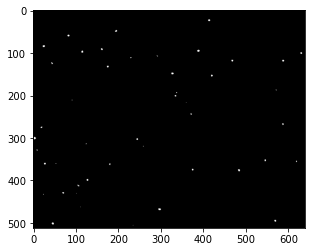

In [31]:
folder_path = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\From erik\\raw output'
im_stack = get_image_stack(
    outputs=[[1,0], [2,1], 0, 1, 2], 
    folder_path=folder_path, 
    frame_im0=20, 
    im_size_width=640, 
    im_size_height=512,
    im_resize_width=640, 
    im_resize_height=512,
    function_img=[Normalize_image],
    function_diff=[Normalize_image])

# plot_image_stack(im_stack)
# plot_prediction(model=model, im_stack=im_stack)
plt.imshow(model.predict(im_stack)[0,:,:,2]>0.8, cmap='gray')

In [32]:
positions = extract_positions(
    no_of_frames=48, 
    outputs=[[1,0], [2,1], 0, 1, 2], 
    folder_path=folder_path, 
    frame_im0=0, 
    im_size_width=640, 
    im_size_height=512,
    im_resize_width=640, 
    im_resize_height=512,
    model=model, 
    layer=2, 
    value_threshold=0.8,
    function_img=[Normalize_image],
    function_diff=[Normalize_image])


In [33]:
list_of_plankton = assign_positions_to_planktons(positions, max_dist=20, threshold = 5, extrapolate=True)
list_of_plankton = Interpolate_gaps_in_plankton_positions(list_of_plankton=list_of_plankton)
list_of_plankton = Trim_list_from_stationary_planktons(list_of_plankton=list_of_plankton, min_distance=0)

plankton_track, plankton_dont_track = split_plankton(percentage_threshold=0.07, list_of_plankton=list_of_plankton)

In [16]:
# plot_and_save_track(no_of_frames=48,
#                     plankton_track=plankton_track,
#                     plankton_dont_track=plankton_dont_track,
#                     folder_path=folder_path,
#                     frame_im0=1,
#                     save_images=1,
#                     show_plankton_track = True,
#                     show_plankton_dont_track = 0,
#                     show_numbers_track = 0,
#                     show_numbers_dont_track = 0,
#                     show_numbers_specific_plankton = False,
#                     show_specific_plankton = False,
#                     specific_plankton = None,
#                     im_size_width=640, 
#                     im_size_height=512,
#                     color_plankton_track = 'b',
#                     color_plankton_dont_track = 'r',
#                     color_specific_plankton = 'w',
#                     save_path = 'E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Raw_output\\b3 report',
#                     frame_name = 'track',
#                     file_type = '.jpg')

In [17]:
# Make_video(frame_im0=0,
#            folder_path='E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Raw_output\\b3 report', 
#            save_path='E:\\Documents\\Anaconda\\Jupyterkod\\Exjobb\\Egen kod\\Exjobb\\New imulations\\Raw_output\\b3 report.avi', 
#            fps=7, 
#            no_of_frames=48)

[42. 52. 55. 46. 42. 42. 47. 53. 50. 48. 47. 44. 40. 44. 42. 44. 46. 40.
 42. 42. 42. 48. 46. 49. 47. 49. 49. 53. 45. 43. 39. 42. 44. 51. 51. 51.
 50. 53. 49. 46. 43. 40. 40. 40. 45. 43. 39. 36.]
[43. 43. 38. 39. 39. 35. 37. 35. 38. 36. 37. 35. 34. 39. 40. 35. 37. 36.
 36. 33. 28. 31. 35. 35. 38. 40. 39. 38. 37. 36. 40. 37. 38. 35. 36. 35.
 37. 36. 38. 36. 36. 34. 36. 38. 39. 34. 40. 38. 36. 35.  0.]
[ 0.  0. 24.  7.  7. 11.  7.  8.  9.  1.  1.  8.  3.  4.  2.  5.  3.  1.
  2.  1.  1.  4.  0.  2.  3.  1.  2.  1.  2.  3.  0.  1.  0.  1.  0.  0.
  0.  1.  0.  1.  0.  3.  0.  0.  2.  4.  1. 11.]
[ 0.  0. 24.  5. 11. 10.  5.  5.  3.  8.  3.  3.  2.  5.  3.  2.  1.  3.
  2.  1.  2.  3.  1.  1.  1.  0.  1.  1.  0.  1.  0.  1.  1.  2.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  2. 13.]


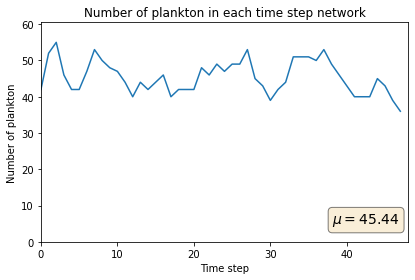

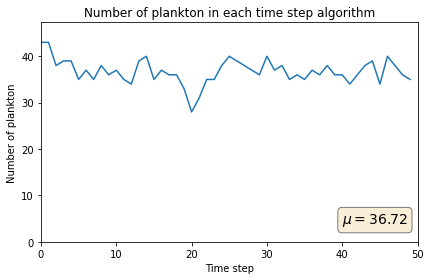

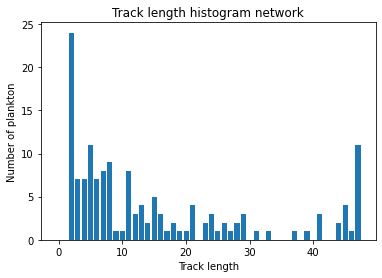

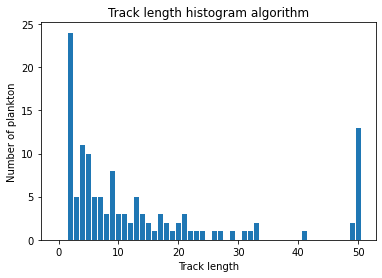

In [34]:
import xml.etree.ElementTree as ET

def plot_statistics(found_plankton_at_timestep, title):
    cropped_finds = found_plankton_at_timestep[np.nonzero(found_plankton_at_timestep)[0]]

    ax = plt.figure()
    plt.plot(range(len(cropped_finds)), cropped_finds)
    plt.xlabel('Time step')
    plt.ylabel('Number of plankton')
    plt.title(title)
    plt.tight_layout()
    mu = np.mean(cropped_finds)
    
    plt.axis([0, len(cropped_finds), 0, max(cropped_finds)*1.1])
    
    textstr = r'$\mu=%.2f$' % (mu, )
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.8, 0.25, textstr, fontsize=14,
            verticalalignment='top', bbox=props)
    
def get_found_plankton_at_timestep(plankton_track):
    no_timesteps = len(plankton_track[list(plankton_track.keys())[0]].positions)
    found_plankton_at_timestep = np.zeros(no_timesteps)

    for plankton in plankton_track:
        plankton = np.array(plankton_track[plankton].positions[:,0], dtype=float)
        where_list = np.where(np.isfinite(plankton))
        for i in where_list[0]:
            found_plankton_at_timestep[i] += 1
    return found_plankton_at_timestep

def get_found_plankton_from_xml(path, no_timesteps, var_str):
    tree = ET.parse(path)
    root = tree.getroot()


    found_plankton_at_timestep = np.zeros(no_timesteps)

    for particle in root.iter():
        my_dict = particle.attrib
        if var_str in my_dict:
            found_plankton_at_timestep[int(float(my_dict[var_str]))] += 1
    return found_plankton_at_timestep


def plot_bars(track_durations, title):
    plt.figure()
    plt.bar(range(len(track_durations)), track_durations)
    
    plt.xlabel('Track length')
    plt.ylabel('Number of plankton')
    plt.title(title)



def get_track_durations(plankton_track):
    no_of_timesteps = len(plankton_track[list(plankton_track.keys())[0]].positions)
    track_durations = np.zeros(no_of_timesteps)
    for plankton in plankton_track:
        plankton = np.array(plankton_track[plankton].positions[:,0], dtype=float)
        where_list = np.where(np.isfinite(plankton))
        track_start = np.min(where_list)
        track_end = np.max(where_list)

        track_durations[track_end-track_start] += 1
    return track_durations


found_plankton_at_timestep = get_found_plankton_at_timestep(plankton_track)     
plot_statistics(found_plankton_at_timestep, 'Number of plankton in each time step network')
print(found_plankton_at_timestep)

path = "E:\\Documents\\Master\\exjobb\\software\\Tracking\\raw output_Tracks.xml"
no_timesteps = 51
found_plankton_at_timestep = get_found_plankton_from_xml(path, no_timesteps, 't')
plot_statistics(found_plankton_at_timestep, 'Number of plankton in each time step algorithm')
print(found_plankton_at_timestep)

track_durations = get_track_durations(plankton_track)
plot_bars(track_durations, 'Track length histogram network')
print(track_durations)

track_durations = get_found_plankton_from_xml(path, no_timesteps, 'nSpots')
plot_bars(track_durations, 'Track length histogram algorithm')
print(track_durations)

(-2.94, 50.0)

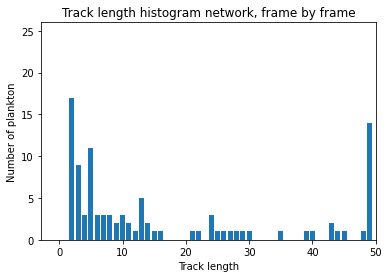

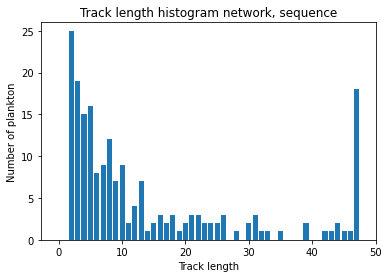

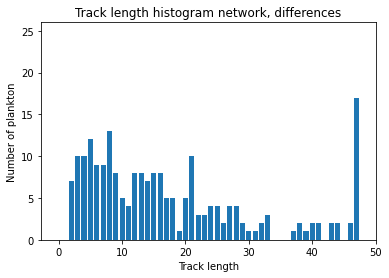

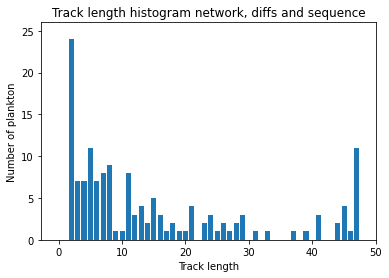

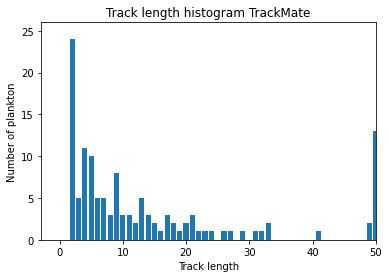

In [122]:
plt.figure()
plt.bar(range(len(fbf_track)), fbf_track)
plt.xlabel('Track length')
plt.ylabel('Number of plankton')
plt.title('Track length histogram network, frame by frame')
plt.ylim(top=26)
plt.xlim(right=50)



plt.figure()
plt.bar(range(len(seq_track)), seq_track)
plt.xlabel('Track length')
plt.ylabel('Number of plankton')
plt.title('Track length histogram network, sequence')
plt.ylim(top=26)
plt.xlim(right=50)



plt.figure()
plt.bar(range(len(diff_track)), diff_track)
plt.xlabel('Track length')
plt.ylabel('Number of plankton')
plt.title('Track length histogram network, differences')
plt.ylim(top=26)
plt.xlim(right=50)



plt.figure()
plt.bar(range(len(b3_track)), b3_track)
plt.xlabel('Track length')
plt.ylabel('Number of plankton')
plt.title('Track length histogram network, diffs and sequence')
plt.ylim(top=26)
plt.xlim(right=50)



plt.figure()
plt.bar(range(len(alg_track)), alg_track)
plt.xlabel('Track length')
plt.ylabel('Number of plankton')
plt.title('Track length histogram TrackMate')
plt.ylim(top=26)
plt.xlim(right=50)


Text(0.27, 0.288, '$\\mu=35.02$\n$\\mu=59.98$\n$\\mu=73.67$\n$\\mu=45.44$\n$\\mu=36.72$')

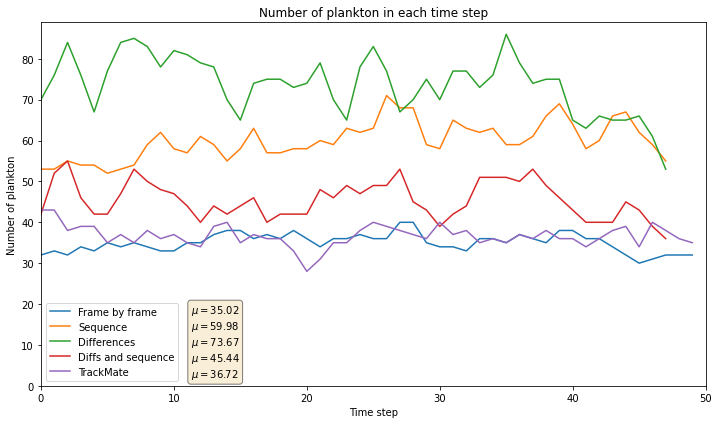

In [121]:
ax = plt.figure(figsize=(10,6))

plt.plot(fbf_timestep)
mufbf = np.mean(fbf_timestep)

plt.plot(seq_timestep)
museq = np.mean(seq_timestep)

plt.plot(diff_timestep)
mudiff = np.mean(diff_timestep)

plt.plot(b3_timestep)
mub3 = np.mean(b3_timestep)

plt.plot(alg_timestep)
mualg = np.mean(alg_timestep)
plt.legend(['Frame by frame', 'Sequence', 'Differences', 'Diffs and sequence', 'TrackMate'], loc='lower left')

plt.xlabel('Time step')
plt.ylabel('Number of plankton')
plt.title('Number of plankton in each time step')
plt.tight_layout()


plt.xlim(left=0)
plt.xlim(right=50)

plt.ylim(bottom=0)

textstr = '\n'.join((
    r'$\mu=%.2f$' % (mufbf, ),
    r'$\mu=%.2f$' % (museq, ),
    r'$\mu=%.2f$' % (mudiff, ),
    r'$\mu=%.2f$' % (mub3, ),
    r'$\mu=%.2f$' % (mualg, ),
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.27, 0.288, textstr, fontsize=10,
        verticalalignment='top', bbox=props)

In [1]:
fbf_timestep_string = '32. 33. 32. 34. 33. 35. 34. 35. 34. 33. 33. 35. 35. 37. 38. 38. 36. 37. 36. 38. 36. 34. 36. 36. 37. 36. 36. 40. 40. 35. 34. 34. 33. 36. 36. 35. 37. 36. 35. 38. 38. 36. 36. 34. 32. 30. 31. 32. 32. 32.'
fbf_str = fbf_timestep_string.replace('.', '')
fbf_timestep = [int(i) for i in fbf_str.split(' ')]

fbf_track_string = '0.  0. 17.  9.  3. 11.  3.  3.  3.  2.  3.  2.  1.  5.  2.  1.  1.  0.  0.  0.  0.  1.  1.  0.  3.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  2.  1.  1.  0.  0.  1. 14'
fbf_track_str = fbf_track_string.replace(' ', '')
fbf_track = [int(i) for i in fbf_track_str.split('.')]

In [54]:
seq_timestep_string = '53. 53. 55. 54. 54. 52. 53. 54. 59. 62. 58. 57. 61. 59. 55. 58. 63. 57. 57. 58. 58. 60. 59. 63. 62. 63. 71. 68. 68. 59. 58. 65. 63. 62. 63. 59. 59. 61. 66. 69. 64. 58. 60. 66. 67. 62. 59. 55.'
seq_str = seq_timestep_string.replace('.', '')
seq_timestep = [int(i) for i in seq_str.split(' ')]

seq_track_string = '0.  0. 25. 19. 15. 16.  8.  9. 12.  7.  9.  2.  4.  7.  1.  2.  3.  2.  3.  1.  2.  3.  3.  2.  2.  2.  3.  0.  1.  0.  2.  3.  1.  1.  0.  1.  0.  0.  0.  2.  0.  0.  1.  1.  2.  1.  1. 18'
seq_track_str = seq_track_string.replace(' ', '')
seq_track = [int(i) for i in seq_track_str.split('.')]


In [55]:
diff_timestep_string = '70. 76. 84. 76. 67. 77. 84. 85. 83. 78. 82. 81. 79. 78. 70. 65. 74. 75. 75. 73. 74. 79. 70. 65. 78. 83. 77. 67. 70. 75. 70. 77. 77. 73. 76. 86. 79. 74. 75. 75. 65. 63. 66. 65. 65. 66. 61. 53.'
diff_str = diff_timestep_string.replace('.', '')
diff_timestep = [int(i) for i in diff_str.split(' ')]

diff_track_string = '0.  0.  7. 10. 10. 12.  9.  9. 13.  8.  5.  4.  8.  8.  7.  8.  8.  5.  5.  1.  5. 10.  3.  3.  4.  4.  2.  4.  4.  2.  1.  1.  2.  3.  0.  0.  0.  1.  2.  1.  2.  2.  0.  2.  2.  0.  2. 17'
diff_track_str = diff_track_string.replace(' ', '')
diff_track = [int(i) for i in diff_track_str.split('.')]

In [56]:
b3_timestep_string = '42. 52. 55. 46. 42. 42. 47. 53. 50. 48. 47. 44. 40. 44. 42. 44. 46. 40. 42. 42. 42. 48. 46. 49. 47. 49. 49. 53. 45. 43. 39. 42. 44. 51. 51. 51. 50. 53. 49. 46. 43. 40. 40. 40. 45. 43. 39. 36.'
b3_str = b3_timestep_string.replace('.', '')
b3_timestep = [int(i) for i in b3_str.split(' ')]

b3_track_string = '0.  0. 24.  7.  7. 11.  7.  8.  9.  1.  1.  8.  3.  4.  2.  5.  3.  1.  2.  1.  1.  4.  0.  2.  3.  1.  2.  1.  2.  3.  0.  1.  0.  1.  0.  0.  0.  1.  0.  1.  0.  3.  0.  0.  2.  4.  1. 11'
b3_track_str = b3_track_string.replace(' ', '')
b3_track = [int(i) for i in b3_track_str.split('.')]

In [3]:
alg_timestep_string = '43. 43. 38. 39. 39. 35. 37. 35. 38. 36. 37. 35. 34. 39. 40. 35. 37. 36. 36. 33. 28. 31. 35. 35. 38. 40. 39. 38. 37. 36. 40. 37. 38. 35. 36. 35. 37. 36. 38. 36. 36. 34. 36. 38. 39. 34. 40. 38. 36. 35.'
alg_str = alg_timestep_string.replace('.', '')
alg_timestep = [int(i) for i in alg_str.split(' ')]

alg_track_string = '0.  0. 24.  5. 11. 10.  5.  5.  3.  8.  3.  3.  2.  5.  3.  2.  1.  3.  2.  1.  2.  3.  1.  1.  1.  0.  1.  1.  0.  1.  0.  1.  1.  2.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  2. 13'
alg_track_str = alg_track_string.replace(' ', '')
alg_track = [int(i) for i in alg_track_str.split('.')]